# IMPORTING DATABASE

In [ ]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob
from google.colab import drive

# CONNECTING DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# IMPORT KAGGLE.JSON (KAGGLE API)

In [ ]:
from google.colab import files

files.upload() #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vanshikakapur24","key":"9b42fb385992016bcb6ceefae747b5b1"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 71 Aug  5 17:14 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pwd

/content


In [ ]:
!kaggle datasets list

ref                                                    title                                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  --------------------------------------  -----  -------------------  -------------  ---------  ---------------  
waqi786/cats-dataset                                   🐾 Cats Dataset                            6KB  2024-07-31 06:12:49           1561         32  1.0              
abhayayare/employee-data-simulation-it-industry        Employee Data Simulation: IT Industry     4KB  2024-07-21 15:26:17           1809         29  1.0              
patricklford/global-ev-sales-2010-2024                 Global EV Sales: 2010-2024               83KB  2024-07-19 13:40:22           2378         32  1.0              
priyamchoksi/credit-card-transactions-dataset          Credit Card Transactions Dataset        145MB  2024-07-23 00:31:47           1374         28  1.0             

#DOWNLOAD DATASET

In [ ]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [00:27<00:00, 136MB/s]
100% 1.98G/1.98G [00:27<00:00, 77.4MB/s]


In [ ]:
!unzip fruit-and-vegetable-image-recognition.zip

Archive:  fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  
  inflati

In [ ]:
#Printing all file names under the input directory
for dirname, _, filenames in os.walk('./test'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('./train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('./validation'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./test/spinach/Image_8.jpg
./test/spinach/Image_2.jpg
./test/spinach/Image_10.jpg
./test/spinach/Image_6.jpg
./test/spinach/Image_9.jpg
./test/spinach/Image_7.jpg
./test/spinach/Image_3.jpg
./test/spinach/Image_4.jpg
./test/spinach/Image_1.jpg
./test/spinach/Image_5.jpg
./test/ginger/Image_8.jpg
./test/ginger/Image_2.jpg
./test/ginger/Image_10.jpg
./test/ginger/Image_6.jpg
./test/ginger/Image_9.jpg
./test/ginger/Image_7.jpg
./test/ginger/Image_3.jpg
./test/ginger/Image_4.jpg
./test/ginger/Image_1.jpg
./test/ginger/Image_5.jpg
./test/tomato/Image_8.jpg
./test/tomato/Image_2.jpg
./test/tomato/Image_10.jpg
./test/tomato/Image_6.jpg
./test/tomato/Image_9.jpg
./test/tomato/Image_7.jpg
./test/tomato/Image_3.jpg
./test/tomato/Image_4.jpg
./test/tomato/Image_1.jpg
./test/tomato/Image_5.jpg
./test/raddish/Image_8.jpg
./test/raddish/Image_2.jpg
./test/raddish/Image_9.jpeg
./test/raddish/Image_5.png
./test/raddish/Image_10.jpg
./test/raddish/Image_6.jpg
./test/raddish/Image_7.jpg
./test/raddish/I

#Setting Training, Test and Validation dir paths

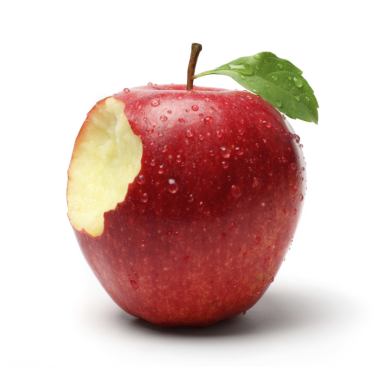

(2216, 2218, 3)


In [ ]:
#Setting Training, Test and Validation dir paths
train_path = './train/'
test_path = './test/'
val_path = './validation/'
#Displaying the image
img = load_img(train_path + "apple/Image_1.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array
x = img_to_array(img)
print(x.shape)

In [ ]:
#Storing occurences of fruits in a list
fruits = []
fruits_image = []
for i in os.listdir(train_path):
    for image_filename in os.listdir(train_path + i):
        fruits.append(i)
        fruits_image.append(i + '/' + image_filename)
#Finding top 10 frequent Fruits
newData = Counter(fruits)
frequent_fruits = newData.most_common(10)
print("Top 10 frequent Fruits:")
frequent_fruits

Top 10 frequent Fruits:


[('peas', 100),
 ('grapes', 100),
 ('pineapple', 99),
 ('turnip', 98),
 ('spinach', 97),
 ('lettuce', 97),
 ('soy beans', 97),
 ('onion', 94),
 ('cucumber', 94),
 ('tomato', 92)]

In [ ]:
#Finding number of classes
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

36




---

## Data preprocessing

Training Image Preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building model

In [ ]:
cnn = tf.keras.models.Sequential()

# Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

# Compiling and Training phase

In [96]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [97]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,404,804 (5.36 MB)

 Trainable params: 1,404,804 (5.36 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.8139 - loss: 0.6015 - val_accuracy: 0.9088 - val_loss: 0.3926
Epoch 2/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.8062 - loss: 0.6447 - val_accuracy: 0.9345 - val_loss: 0.3620
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.8417 - loss: 0.4927 - val_accuracy: 0.9430 - val_loss: 0.2719
Epoch 4/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.8503 - loss: 0.5199 - val_accuracy: 0.9430 - val_loss: 0.2574
Epoch 5/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.8556 - loss: 0.4355 - val_accuracy: 0.9345 - val_loss: 0.2750
Epoch 6/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.8749 - loss: 0.4199 - val_accuracy: 0.9516 - val_loss: 0.2339
Epoch 7/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.8811 - loss: 0.4399 - val_accuracy: 0.9402 - val_loss: 0.2821
Epoch 8/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8898 - loss: 0.3590 - val_accuracy: 0.9544 - v

##Evaluating Model

In [100]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 849ms/step - accuracy: 0.9809 - loss: 0.0712
Training accuracy: 0.9820224642753601


In [101]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 902ms/step - accuracy: 0.9616 - loss: 0.1946
Validation accuracy: 0.9629629850387573


##Saving Model

In [102]:
cnn.save('trained_model.h5')

In [103]:
training_history.history #Return Dictionary of history

{'accuracy': [0.812199056148529,
  0.8253611326217651,
  0.8417335748672485,
  0.8436596989631653,
  0.8629213571548462,
  0.8703050017356873,
  0.8696629405021667,
  0.8834670782089233,
  0.8609951734542847,
  0.8895666003227234,
  0.8924558758735657,
  0.8959871530532837,
  0.8959871530532837,
  0.8969502449035645,
  0.9056179523468018],
 'loss': [0.6171393990516663,
  0.5772810578346252,
  0.5165634155273438,
  0.5391612648963928,
  0.43695756793022156,
  0.42158517241477966,
  0.45758241415023804,
  0.39180248975753784,
  0.48225638270378113,
  0.3542100489139557,
  0.33100536465644836,
  0.3547377288341522,
  0.3590182363986969,
  0.35680633783340454,
  0.32617032527923584],
 'val_accuracy': [0.9088318943977356,
  0.934472918510437,
  0.9430199265480042,
  0.9430199265480042,
  0.934472918510437,
  0.9515669345855713,
  0.94017094373703,
  0.9544159770011902,
  0.945868968963623,
  0.9515669345855713,
  0.9658119678497314,
  0.9487179517745972,
  0.9629629850387573,
  0.9487179517

In [104]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [105]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


##Calculating Accuracy of Model Achieved on Validation set

In [106]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 96.29629850387573 %


#Accuracy Visualization

##Training Visualization

In [107]:
#training_history.history['accuracy']

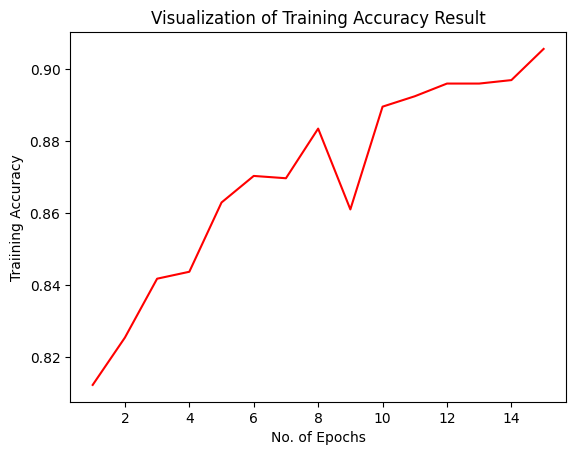

In [109]:
epochs = [i for i in range(1,16)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

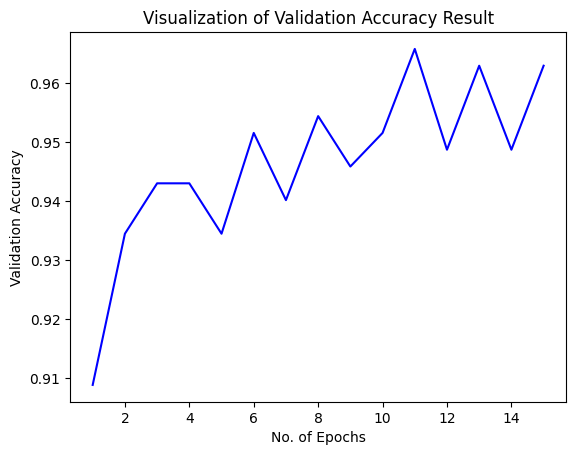

In [110]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [111]:
test_set = tf.keras.utils.image_dataset_from_directory(
    './test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [112]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9678 - loss: 0.2040
Test accuracy: 0.9637883305549622


### TESTING

In [113]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

#Visualising and Performing Prediction on Single image

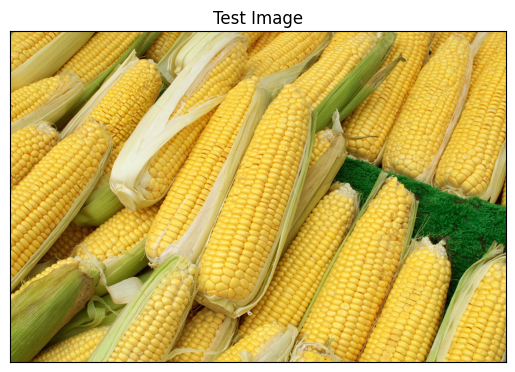

In [114]:
#Test Image Visualization
import cv2
image_path = './test/corn/Image_1.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

#Testing Model

In [115]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


In [116]:
print(predictions)

[[1.0171331e-08 2.1839342e-03 3.7434313e-12 6.1572372e-08 7.3580679e-08
  1.4859589e-08 1.8482152e-09 2.8736717e-05 9.3548724e-10 7.0987046e-01
  4.6844406e-07 8.7904649e-11 1.0319257e-08 2.4371235e-05 9.5930063e-06
  7.3855355e-10 4.4487565e-06 7.0214103e-04 6.0379091e-10 4.0413320e-06
  8.7282193e-10 1.3336879e-06 1.3592520e-10 1.3849209e-04 6.3328671e-06
  9.5270494e-05 1.2107002e-13 7.9254887e-06 1.3021726e-07 3.2696462e-05
  1.1861675e-09 2.8688881e-01 3.4790296e-11 6.9059293e-11 5.2481937e-08
  6.2248313e-07]]


In [117]:
# test_set.class_names

In [118]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

9


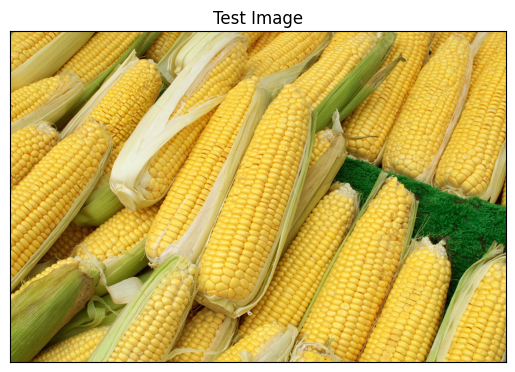

In [119]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [120]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a corn
